In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from ml_recon.utils import ifft_2d_img, image_slices, fft_2d_img
from torchvision.transforms.functional import center_crop

In [21]:
sense = np.load('/home/brenden/Documents/Coding/data/sens2.npy')

In [ ]:
sense = center_crop(torch.from_numpy(sense), [240, 240])

In [23]:
vec = sense.reshape(32, -1)

In [24]:
U, s, Vh= np.linalg.svd(vec, full_matrices=False)

In [ ]:
sense_10 = Vh[:10, ].reshape(10, 240, 240) * s[:10, None, None]

In [27]:
sense_10 = np.transpose(sense_10, (0, 2, 1))

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

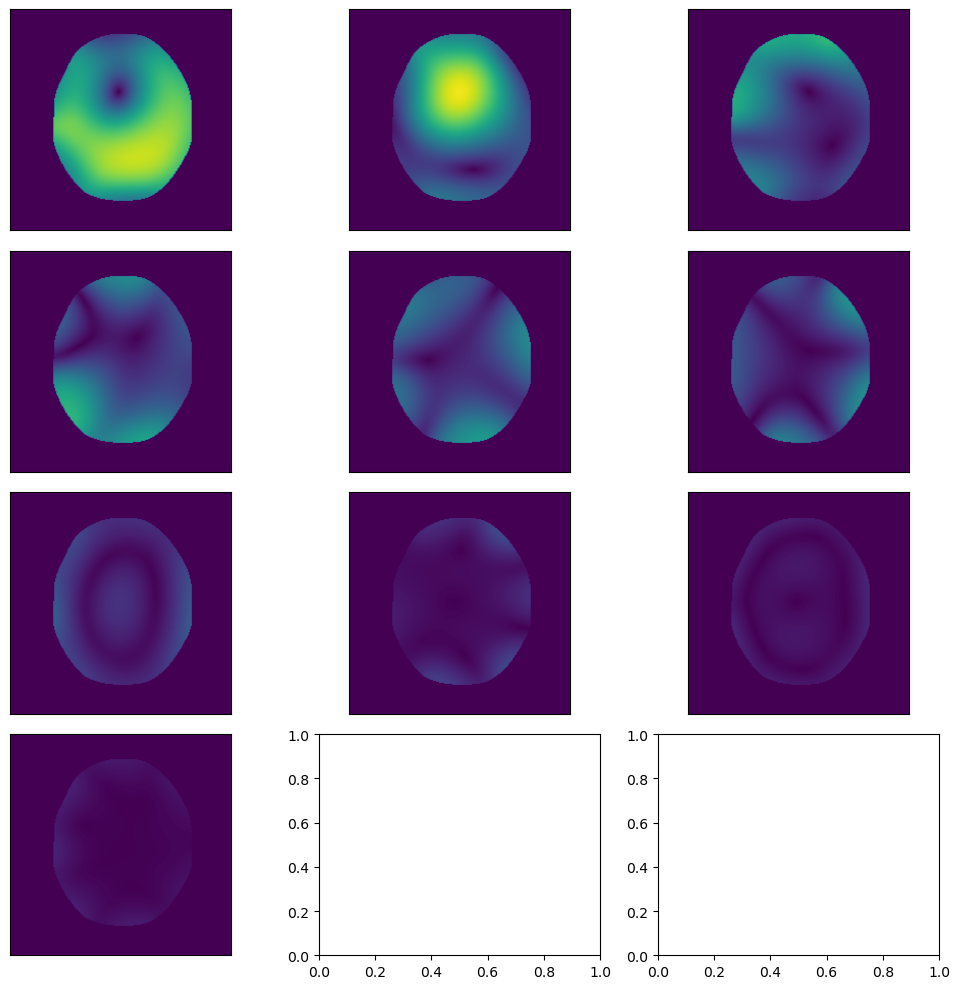

In [28]:
image_slices(np.abs(sense_10), vmax=1)

In [29]:
sense_kernels = ifft_2d_img(sense_10, axes=(-1, -2))

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

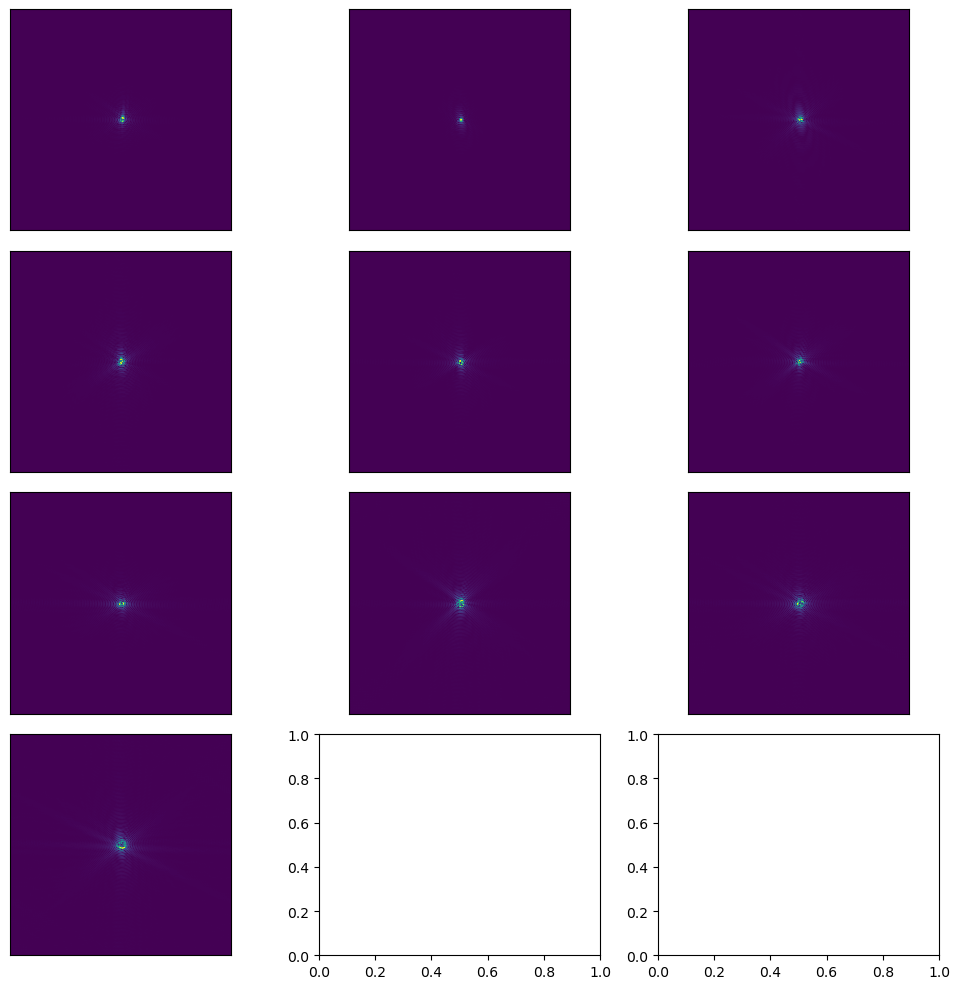

In [30]:
image_slices(np.abs(sense_kernels))

In [32]:
coil_maps = fft_2d_img(center_crop(torch.from_numpy(sense_kernels), [240, 240]))

In [21]:
np.save('coil_compressed_10.npy', sense_10)